In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
happy = pd.read_csv('Happiness.csv').dropna()
happy

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


# conclusion 3

# Select features to build the model

In [5]:
X = happy['Score'].values
X

array([7.769, 7.6  , 7.554, 7.494, 7.488, 7.48 , 7.343, 7.307, 7.278,
       7.246, 7.228, 7.167, 7.139, 7.09 , 7.054, 7.021, 6.985, 6.923,
       6.892, 6.852, 6.825, 6.726, 6.595, 6.592, 6.446, 6.444, 6.436,
       6.375, 6.374, 6.354, 6.321, 6.3  , 6.293, 6.262, 6.253, 6.223,
       6.199, 6.198, 6.192, 6.182, 6.174, 6.149, 6.125, 6.118, 6.105,
       6.1  , 6.086, 6.07 , 6.046, 6.028, 6.021, 6.008, 5.94 , 5.895,
       5.893, 5.89 , 5.888, 5.886, 5.86 , 5.809, 5.779, 5.758, 5.743,
       5.718, 5.697, 5.693, 5.653, 5.648, 5.631, 5.603, 5.529, 5.525,
       5.523, 5.467, 5.432, 5.43 , 5.425, 5.386, 5.373, 5.339, 5.323,
       5.287, 5.285, 5.274, 5.265, 5.261, 5.247, 5.211, 5.208, 5.208,
       5.197, 5.192, 5.191, 5.175, 5.082, 5.044, 5.011, 4.996, 4.944,
       4.913, 4.906, 4.883, 4.812, 4.799, 4.796, 4.722, 4.719, 4.707,
       4.7  , 4.696, 4.681, 4.668, 4.639, 4.628, 4.587, 4.559, 4.548,
       4.534, 4.519, 4.516, 4.509, 4.49 , 4.466, 4.461, 4.456, 4.437,
       4.418, 4.39 ,

In [6]:
Y = happy['Social support'].values
Y

array([1.587, 1.573, 1.582, 1.624, 1.522, 1.526, 1.487, 1.557, 1.505,
       1.475, 1.548, 1.441, 1.455, 1.479, 1.538, 1.553, 1.454, 1.504,
       1.457, 1.487, 1.31 , 1.52 , 1.323, 1.472, 1.43 , 1.369, 1.269,
       1.357, 1.313, 1.484, 1.442, 1.439, 1.465, 1.463, 1.242, 1.488,
       1.368, 1.504, 1.477, 1.438, 1.529, 1.515, 1.41 , 1.523, 1.325,
       1.232, 1.432, 1.232, 1.223, 1.312, 1.319, 1.409, 1.465, 1.219,
       1.528, 1.478, 1.402, 1.419, 1.236, 1.508, 1.209, 1.41 , 1.475,
       1.252, 1.274, 1.431, 0.886, 1.452, 1.293, 1.383, 1.328, 1.303,
       1.361, 1.098, 1.266, 1.277, 1.401, 1.212, 1.36 , 1.171, 1.465,
       1.156, 1.531, 1.294, 1.111, 1.438, 1.538, 1.16 , 0.782, 1.147,
       1.224, 1.203, 1.125, 1.346, 1.321, 0.91 , 1.513, 0.868, 0.808,
       1.226, 1.225, 0.437, 0.799, 1.183, 1.03 , 1.351, 0.848, 1.427,
       1.122, 1.247, 1.134, 0.698, 1.313, 0.774, 1.056, 1.055, 0.842,
       0.829, 0.666, 0.939, 0.983, 1.167, 0.986, 1.   , 0.928, 0.98 ,
       1.125, 1.105,

# Reshape X data

In [7]:
X = X.reshape(-1,1)
X

array([[7.769],
       [7.6  ],
       [7.554],
       [7.494],
       [7.488],
       [7.48 ],
       [7.343],
       [7.307],
       [7.278],
       [7.246],
       [7.228],
       [7.167],
       [7.139],
       [7.09 ],
       [7.054],
       [7.021],
       [6.985],
       [6.923],
       [6.892],
       [6.852],
       [6.825],
       [6.726],
       [6.595],
       [6.592],
       [6.446],
       [6.444],
       [6.436],
       [6.375],
       [6.374],
       [6.354],
       [6.321],
       [6.3  ],
       [6.293],
       [6.262],
       [6.253],
       [6.223],
       [6.199],
       [6.198],
       [6.192],
       [6.182],
       [6.174],
       [6.149],
       [6.125],
       [6.118],
       [6.105],
       [6.1  ],
       [6.086],
       [6.07 ],
       [6.046],
       [6.028],
       [6.021],
       [6.008],
       [5.94 ],
       [5.895],
       [5.893],
       [5.89 ],
       [5.888],
       [5.886],
       [5.86 ],
       [5.809],
       [5.779],
       [5.758],
       [

# Split data into train and test

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

# plot the training data - Visualization purposes

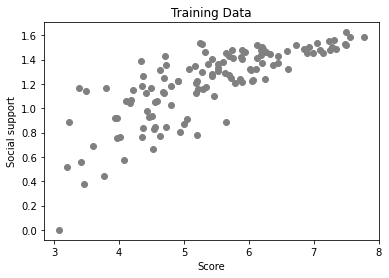

In [9]:
%matplotlib inline
plt.scatter(x_train, y_train, color='grey')
plt.xlabel('Score')
plt.ylabel('Social support')
plt.title('Training Data')
plt.show()

In [10]:
x_train

array([[3.231],
       [4.456],
       [7.139],
       [6.985],
       [5.743],
       [4.418],
       [3.973],
       [3.41 ],
       [3.933],
       [4.519],
       [4.796],
       [4.548],
       [5.467],
       [4.719],
       [5.287],
       [6.198],
       [7.343],
       [6.444],
       [6.726],
       [4.587],
       [5.43 ],
       [7.246],
       [6.592],
       [6.223],
       [4.628],
       [5.197],
       [4.189],
       [5.208],
       [4.559],
       [4.35 ],
       [4.49 ],
       [4.374],
       [4.166],
       [6.595],
       [5.603],
       [4.015],
       [6.262],
       [6.125],
       [4.534],
       [7.48 ],
       [6.199],
       [6.118],
       [5.94 ],
       [4.212],
       [4.516],
       [3.975],
       [7.228],
       [3.38 ],
       [5.285],
       [5.529],
       [7.494],
       [5.425],
       [5.886],
       [5.044],
       [7.769],
       [5.373],
       [5.191],
       [5.274],
       [6.021],
       [5.631],
       [4.913],
       [4.996],
       [

In [11]:
y_train

array([0.885, 0.928, 1.455, 1.454, 1.475, 1.125, 0.757, 0.56 , 0.916,
       0.666, 1.03 , 0.842, 1.098, 0.848, 1.156, 1.504, 1.487, 1.369,
       1.52 , 1.056, 1.277, 1.475, 1.472, 1.488, 0.774, 1.224, 1.069,
       0.782, 1.055, 0.766, 1.167, 0.841, 1.039, 1.323, 1.383, 0.765,
       1.463, 1.41 , 0.829, 1.526, 1.368, 1.523, 1.465, 1.149, 0.939,
       0.922, 1.548, 1.163, 1.531, 1.328, 1.624, 1.401, 1.419, 0.91 ,
       1.587, 1.36 , 1.125, 1.294, 1.319, 1.293, 1.226, 0.868, 1.247,
       1.479, 1.361, 1.504, 1.266, 1.313, 1.169, 1.134, 1.274, 1.457,
       1.325, 1.477, 1.438, 0.98 , 1.223, 1.442, 1.402, 1.357, 0.688,
       1.252, 1.145, 1.487, 0.378, 1.351, 1.582, 1.465, 1.303, 1.478,
       0.447, 1.41 , 1.431, 1.232, 1.312, 1.557, 0.517, 1.203, 1.522,
       1.225, 1.265, 1.39 , 1.122, 1.181, 1.538, 1.346, 1.058, 1.236,
       1.209, 1.427, 0.   , 1.242, 1.538, 0.886, 1.219, 0.808, 1.321,
       0.572, 1.171, 1.16 , 1.183, 1.452, 1.43 , 1.505])

# Linear Regression Model

In [12]:

model = LinearRegression()
model.fit(x_train, y_train)
model

LinearRegression()

In [13]:
y_predict = model.predict(x_test)
y_predict

array([1.35516082, 1.57753166, 1.01462291, 1.54710416, 0.99878394,
       1.05672123, 0.97710955, 1.66777212, 1.10152885, 1.33598733,
       1.39684233, 1.12820502, 1.42518575, 1.40809633, 1.02358443,
       1.20635784, 1.36537279, 1.37058298, 1.29451423, 1.08673192,
       1.31202046, 1.39538347, 1.18114053, 0.84727166, 1.35224311,
       0.67846156, 0.77870558, 1.50625628, 1.41226448, 1.1692613 ,
       1.01358087, 1.1803069 ])

In [14]:
y_test

array([1.232, 1.441, 0.986, 1.553, 1.105, 0.698, 1.033, 1.573, 0.437,
       1.409, 1.439, 1.513, 1.269, 1.484, 0.983, 1.212, 1.515, 1.529,
       1.508, 0.799, 1.528, 1.465, 1.111, 1.114, 1.432, 0.575, 0.711,
       1.31 , 1.313, 1.147, 1.   , 1.438])

In [15]:
print(f'Testing Accuracy: {model.score(x_test, y_test)*100}%')

Testing Accuracy: 58.533915000502226%


In [16]:
print(f'Training Accuracy: {model.score(x_train, y_train)*100}%')

Training Accuracy: 60.88751920483298%


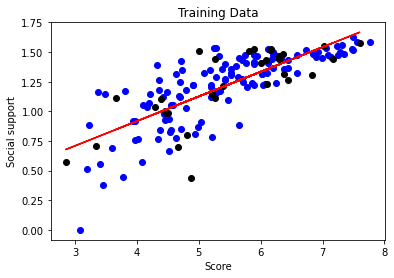

In [17]:
%matplotlib inline
plt.scatter(x_train, y_train, color='blue')
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_predict, color='red')
plt.xlabel('Score')
plt.ylabel('Social support')
plt.title('Training Data')
plt.show()

In [ ]:
- the more social support you have , the happiest you become
- Test accuracy is about 58 % while train accuracy is about 60 %